<a href="https://colab.research.google.com/github/AlfredSydneyBrown/AlfredSydneyBrown.github.io/blob/main/Data_Collection_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


The following is largely inspired by https://juanitorduz.github.io/germany_plots/


#Installing necessary libraries and accessing correct drive-folder

In [3]:
!pip install geopandas
!apt-get -qq install python-cartopy python3-cartopy
import cartopy
!pip install geoplot

     |████████████████████████████████| 972kB 5.8MB/s 
     |████████████████████████████████| 6.5MB 31.2MB/s 
     |████████████████████████████████| 14.8MB 309kB/s 
Selecting previously unselected package python-pkg-resources.
(Reading database ... 144793 files and directories currently installed.)
Preparing to unpack .../0-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.
Preparing to unpack .../1-python-pyshp_1.2.12+ds-1_all.deb ...
Unpacking python-pyshp (1.2.12+ds-1) ...
Selecting previously unselected package python-shapely.
Preparing to unpack .../2-python-shapely_1.6.4-1_amd64.deb ...
Unpacking python-shapely (1.6.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-cartopy:amd64.
Preparing to unpack .../4-python-cartopy_0.14.2+dfsg1-2build

In [4]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

%matplotlib inline

In [5]:
cd "/content/gdrive/My Drive/Colab Notebooks/Housing Market Analysis"

/content/gdrive/My Drive/Colab Notebooks/Housing Market Analysis


#Data collection


Getting German postalcode data and their geolocations 


In [6]:
plz_shape_df = gpd.read_file('Data/plz-gebiete.shp', dtype={'plz': str})

plz_shape_df.head()

,plz,note,geometry
0,52538,"52538 Gangelt, Selfkant","POLYGON ((5.86632 51.05110, 5.86692 51.05124, ..."
1,47559,47559 Kranenburg,"POLYGON ((5.94504 51.82354, 5.94580 51.82409, ..."
2,52525,"52525 Waldfeucht, Heinsberg","POLYGON ((5.96811 51.05556, 5.96951 51.05660, ..."
3,52074,52074 Aachen,"POLYGON ((5.97486 50.79804, 5.97495 50.79809, ..."
4,52531,52531 Ãbach-Palenberg,"POLYGON ((6.01507 50.94788, 6.03854 50.93561, ..."


Getting allocation of Bundesland to postalcode data


In [7]:
plz_region_df = pd.read_csv(
    'Data/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

,ort,plz,bundesland
0,Aach,78267,Baden-Württemberg
1,Aach,54298,Rheinland-Pfalz
2,Aachen,52062,Nordrhein-Westfalen
3,Aachen,52064,Nordrhein-Westfalen
4,Aachen,52066,Nordrhein-Westfalen


Getting population data per postcode address


In [8]:
plz_einwohner_df = pd.read_csv(
    'Data/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

,plz,einwohner
0,01067,11957
1,01069,25491
2,01097,14821
3,01099,28018
4,01108,5876


Getting Upcoming projects data 


In [9]:
projects_df = pd.read_csv('Data/projects.csv', sep=';')

projects_df.head()

,id,name,bezeichnung,zusammenfassung,start,ende,gesamt,satz,kofinanzierung,plz,land,themenfeld
0,3,beneficiary name,operation name,operation summary,1970-01-01,1970-01-01,0.000,co-financing \nrate,0.000,0,country,intervention field
1,6,Landesjugendring Berlin,Freiwilliges Soziales Jahr (FSJ) in der Jugend...,Die Rahmenbedingungen für ein FSJ werden durch...,2015-09-01,2016-08-31,381.764,"43,60%",48.685,10963,DE300,117 - Förderung des gleichen Zugangs zum leben...
2,9,Stiftung Naturschutz Berlin,Projekt: 1600006356 - Antrag - FÖJ 2015/2016 -...,Die Rahmenbedingungen für ein FÖJ werden durch...,2015-09-01,2016-08-31,1.741,50%,708.944,10785,DE300,117 - Förderung des gleichen Zugangs zum leben...
3,12,Vereinigung Junger Freiwilliger e.V.,Freiwilliges Ökologisches Jahr,Die Rahmenbedingungen für ein FÖJ werden durch...,2015-09-01,2016-08-31,656.605,50%,269.400,13088,DE300,117 - Förderung des gleichen Zugangs zum leben...
4,15,LKJ Berlin e.V.,Freiwilliges Soziales Jahr in der Kultur (FSJ ...,Die Rahmenbedingungen für ein FSJ werden durc...,2015-09-01,2016-08-31,941.690,"21,20%",742.056,10963,DE300,117 - Förderung des gleichen Zugangs zum leben...


In [10]:

project_postcodes = plz_einwohner_df['plz']

num_projects_per_postcode = []
total_project_costs_per_postcode = []
for i in project_postcodes.drop_duplicates()[1:]:
  num_projects_per_postcode.append(projects_df[projects_df['plz'].isin([i])].shape[0])
  total_project_costs_per_postcode.append(projects_df[projects_df['plz'].isin([i])].sum(0)['gesamt'])

projects_data = {'plz': project_postcodes.drop_duplicates()[1:], 'num_social_proj': num_projects_per_postcode, 'total_proj_costs':total_project_costs_per_postcode}
projects_df = pd.DataFrame(projects_data)

projects_df.tail()

,plz,num_social_proj,total_proj_costs
8164,99988,0,0.0
8165,99991,0,0.0
8166,99994,0,0.0
8167,99996,0,0.0
8168,99998,0,0.0


**Getting up-to-date apartment buying prices across the city**

This is the selenium based code I used to web scrape the publicly available data on https://www.homeday.de/de/preisatlas/berlin



In [11]:
# from selenium import webdriver
# from selenium.webdriver.common.keys import Keys
# import pandas as pd
# PATH = r"C:\Users\Admin\Desktop\Coding\chromedriver.exe" #note must be changed to one's own file path
# print(PATH)

# berlin_plz = ['14109', '14089', '13591', '13587', '13593', '13589', '13581', '14129', '13583', '13595', '14193', '13585', '13597', '14055', '13503', '13505', '13599', '14163', '14053', '14165', '14052', '14169', '13629', '13507', '14050', '14195', '13405', '14167', '13465', '13627', '14057', '14059', '10711', '14199', '12205', '13467', '13509', '10589', '12203', '12207', '10627', '10709', '10629', '10585', '14197', '10587', '10713', '13469', '13437', '13403', '12163', '12165', '10707', '10625', '10553', '12209', '13351', '10623', '10719', '12167', '10717', '12161', '10715', '12169', '12247', '13353', '10555', '12157', '10551', '12159', '13435', '10789', '10777', '13349', '10779', '13407', '10787', '12249', '10825', '10557', '13439', '10827', '12279', '10559', '10829', '10823', '10781', '13158', '10785', '13347', '12277', '10783', '12105', '13409', '12307', '12103', '13359', '12101', '10115', '12107', '13159', '10965', '13357', '10117', '13156', '10963', '13355', '12099', '12109', '10961', '10969', '12305', '13187', '10178', '10439', '10119', '10437', '10435', '12349', '10179', '13127', '10967', '12309', '13189', '12347', '10999', '10405', '12049', '12051', '10997', '10249', '12047', '10243', '10407', '12043', '12053', '10409', '13089', '13086', '12045', '12353', '13129', '12359', '12351', '12059', '12435', '12055', '12057', '10245', '13125', '13088', '10247', '10369', '12437', '10317', '13053', '12355', '12357', '10367', '10365', '13055', '13051', '12487', '10319', '12459', '12439', '10315', '13059', '10318', '13057', '12524', '12681', '12489', '12526', '12683', '12685', '12679', '12689', '12555', '12687', '12527', '12557', '12621', '12619', '12623', '12629', '12559', '12627', '12587', '12589']
# av_prices = []
# city_trend = []
# plz_trend = []


# for idx, i in enumerate(berlin_plz):
#     wd = webdriver.Chrome(PATH)
#     weblink = "https://www.homeday.de/de/preisatlas/berlin/{}?".format(i)
#     print(weblink)
#     print(idx + 1, "/", len(berlin_plz))
#     wd.get(weblink)
#     av_price = wd.find_elements_by_class_name("price-block__price__average")
#     price_trends = wd.find_elements_by_class_name("ct-point")

#     c_trend = []
#     for trend in price_trends[:11]:
#         c_trend += [trend.get_attribute("datavalue")]
#     city_trend.append(c_trend)

#     p_trend = []
#     for trend in price_trends[11:22]:
#         p_trend.append(trend.get_attribute("datavalue"))
#     plz_trend.append(p_trend)

#     av_prices.append(av_price[1].text[2:-5])
#     #print(av_prices)
#     wd.quit()


# dic = {'plz': berlin_plz, 'av_buy_price (€/m²)': av_prices, 'plz_buy_trend (€/m²)':plz_trend,'city_buy_trend (€/m²)':city_trend}
# buy_df = pd.DataFrame(dic)  
    
# # saving the dataframe  
# buy_df.to_csv(r'C:\Users\Admin\Desktop\Coding\buy_data.csv') 


In [12]:
#now extracting the data gathered by the code above
berlin_buy_info_df = pd.read_csv('Data/buy_data.csv', sep=',')
berlin_buy_info_df.drop(columns=berlin_buy_info_df.columns[[0]], axis=1, inplace=True)
berlin_buy_info_df.head()

#The plz buy trend contains the average prices for every quarter year since Q4 of 2017, and up until Q2 of this year.
#ie.
# 2017 Q4
# 2018 Q1, Q2, Q3, Q4
# 2019 Q1, Q2, Q3, Q4
# 2019 Q1, Q2,

,plz,av_buy_price (€/m²),plz_buy_trend (€/m²),city_buy_trend (€/m²)
0,14109,4.70,"['3300', '3400', '3450', '3550', '3550', '3650...","['4750', '5000', '5150', '5150', '5150', '5250..."
1,14089,3.85,"['3300', '3400', '3450', '3550', '3550', '3650...","['3250', '3300', '3350', '3450', '3400', '3600..."
2,13591,3.00,"['3300', '3400', '3450', '3550', '3550', '3650...","['3200', '3300', '3400', '3400', '3400', '3450..."
3,13587,3.00,"['3300', '3400', '3450', '3550', '3550', '3650...","['2950', '3000', '3050', '3150', '3150', '3000..."
4,13593,3.00,"['3300', '3400', '3450', '3550', '3550', '3650...","['3200', '3300', '3400', '3400', '3400', '3450..."


Merging data


In [13]:
#merging postleitzahl and regions
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)
germany_df.drop(['note'], axis=1, inplace=True)

germany_df.head()

#merging above with population numbers

germany_df = pd.merge(
    left=germany_df, 
    right=projects_df, 
    on='plz',
    how='left'
)

germany_df.head()

#merging with projects
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

berlin_df = germany_df.query('ort == "Berlin"')
berlin_df.drop(['bundesland'], axis=1, inplace=True)

berlin_df['plz']= berlin_df['plz'].astype(int)
berlin_df = pd.merge(
    left=berlin_df, 
    right=berlin_buy_info_df, 
    on='plz',
    how='left'
)
berlin_df.head()



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,plz,geometry,ort,num_social_proj,total_proj_costs,einwohner,av_buy_price (€/m²),plz_buy_trend (€/m²),city_buy_trend (€/m²)
0,14109,"POLYGON ((13.08835 52.41963, 13.09584 52.42198...",Berlin,1.0,9.95,10049,4.70,"['3300', '3400', '3450', '3550', '3550', '3650...","['4750', '5000', '5150', '5150', '5150', '5250..."
1,14089,"POLYGON ((13.10929 52.45063, 13.10956 52.45108...",Berlin,0.0,0.00,17734,3.85,"['3300', '3400', '3450', '3550', '3550', '3650...","['3250', '3300', '3350', '3450', '3400', '3600..."
2,13591,"POLYGON ((13.11738 52.51706, 13.11811 52.52010...",Berlin,1.0,10.00,26762,3.00,"['3300', '3400', '3450', '3550', '3550', '3650...","['3200', '3300', '3400', '3400', '3400', '3450..."
3,13587,"POLYGON ((13.12796 52.58313, 13.12934 52.58593...",Berlin,0.0,0.00,20108,3.00,"['3300', '3400', '3450', '3550', '3550', '3650...","['2950', '3000', '3050', '3150', '3150', '3000..."
4,13593,"POLYGON ((13.14288 52.52181, 13.14306 52.52179...",Berlin,0.0,0.00,20238,3.00,"['3300', '3400', '3450', '3550', '3550', '3650...","['3200', '3300', '3400', '3400', '3400', '3450..."


In [14]:

berlin_df['coords'] = berlin_df['geometry'].apply(lambda x: x.centroid.coords[:])
berlin_df['coords'] = [coords[0] for coords in berlin_df['coords']]

berlin_df.sample(5)

,plz,geometry,ort,num_social_proj,total_proj_costs,einwohner,av_buy_price (€/m²),plz_buy_trend (€/m²),city_buy_trend (€/m²),coords
129,10405,"POLYGON ((13.41172 52.52985, 13.41191 52.53000...",Berlin,9.0,651.427,27350,5.45,"['3300', '3400', '3450', '3550', '3550', '3650...","['4850', '4850', '4900', '4900', '4900', '5550...","(13.425551309492946, 52.53515906977922)"
45,10587,"POLYGON ((13.29967 52.52112, 13.30012 52.52188...",Berlin,7.0,2791.311,11069,4.90,"['3300', '3400', '3450', '3550', '3550', '3650...","['4750', '4800', '4850', '4950', '4950', '4800...","(13.319509481505342, 52.51846849550125)"
141,13086,"POLYGON ((13.42906 52.55643, 13.42936 52.55665...",Berlin,31.0,5153.165,24062,3.95,"['3300', '3400', '3450', '3550', '3550', '3650...","['3500', '3550', '3600', '3600', '3700', '3750...","(13.44859349957451, 52.5564393371065)"
133,10249,"POLYGON ((13.41975 52.52555, 13.42364 52.52792...",Berlin,5.0,49.991,25981,5.05,"['3300', '3400', '3450', '3550', '3550', '3650...","['4450', '4500', '4600', '4650', '4700', '4750...","(13.44293774912635, 52.523816659667695)"
43,10585,"POLYGON ((13.29676 52.51857, 13.29682 52.51858...",Berlin,0.0,0.000,12688,4.90,"['3300', '3400', '3450', '3550', '3550', '3650...","['4750', '4800', '4850', '4950', '4950', '4800...","(13.305681979631983, 52.51520234812819)"


Getting District Names


In [15]:
berlin_plz_area_df = pd.read_csv(
    'Data/Bezirkzuordnung.csv', 
    dtype={'plz': int}
)

berlin_df = pd.merge(
    left=berlin_df, 
    right=berlin_plz_area_df, 
    on='plz',
    how='left'
)

berlin_df.sample(5)

,plz,geometry,ort,num_social_proj,total_proj_costs,einwohner,av_buy_price (€/m²),plz_buy_trend (€/m²),city_buy_trend (€/m²),coords,area
61,13403,"POLYGON ((13.30170 52.57370, 13.30341 52.57488...",Berlin,18.0,3875.015,26703,3.30,"['3300', '3400', '3450', '3550', '3550', '3650...","['3300', '3400', '3500', '3550', '3600', '3900...","(13.322528758866365, 52.57393189053797)",Reinickendorf
235,12679,"POLYGON ((13.54157 52.54268, 13.54255 52.54392...",Berlin,1.0,68.799,25823,3.00,"['3300', '3400', '3450', '3550', '3550', '3650...","['2800', '2900', '3000', '3050', '3100', '3050...","(13.563251812805971, 52.54922778710836)",Marzahn-Hellersdorf
176,10999,"POLYGON ((13.41124 52.49661, 13.41227 52.49799...",Berlin,7.0,1125.718,24321,5.05,"['3300', '3400', '3450', '3550', '3550', '3650...","['4450', '4500', '4600', '4650', '4700', '4750...","(13.426544449349791, 52.496929407758394)",Friedrichshain-Kreuzberg
199,12435,"POLYGON ((13.43964 52.48990, 13.43972 52.49025...",Berlin,15.0,2053.444,16319,4.45,"['3300', '3400', '3450', '3550', '3550', '3650...","['3500', '3650', '3750', '3800', '3800', '3650...","(13.466302556885676, 52.48696123287111)",Treptow-Köpenick
201,12057,"POLYGON ((13.44121 52.46719, 13.44152 52.46723...",Berlin,13.0,1793.729,14734,3.30,"['3300', '3400', '3450', '3550', '3550', '3650...","['3200', '3300', '3350', '3400', '3400', '3450...","(13.463213635414865, 52.46838400596176)",Neukölln


District Coordinates from Airbnb data

In [16]:
berlin_neighbourhoods_df = gpd.read_file('Data/neighbourhoods.geojson')

berlin_neighbourhoods_df = berlin_neighbourhoods_df \
    [~ berlin_neighbourhoods_df['neighbourhood_group'].isnull()]

berlin_neighbourhoods_df.head()

districts_df = berlin_neighbourhoods_df.dissolve(by='neighbourhood_group')

#Plotting Preparation


In [17]:
plt.rcParams['figure.figsize'] = [16, 11]
from IPython.display import display


In [114]:
def show_plot_for(category, show_n_largest=0, show_n_smallest=0, print_details=False, show_bezirke=False):
  fig, ax = plt.subplots()
  berlin_df.plot(
      ax=ax, 
      column=category, 
      categorical=False, 
      legend=True, 
      cmap='autumn_r',
      edgecolor='black',
      linewidth=0.3
  )


  if show_bezirke == True:
    districts_df.plot(ax=ax, edgecolor='k',linewidth = 1)
  

  if show_n_largest > 0:
    largest_df = berlin_df.nlargest(show_n_largest, columns=category)
    largest_df.plot(ax=ax,color='red', edgecolor='k',linewidth = 2)
    if print_details == True: 
      print("--------------- Max (colour: red) -------------")
      display(largest_df)
      print("\n")
    

  if show_n_smallest > 0:
    smallest_df = berlin_df.nsmallest(show_n_smallest, columns=category)
    smallest_df.plot(ax=ax,color='yellow', edgecolor='k',linewidth = 2)
    if print_details == True:
      print("--------------- Min (colour: yellow) -------------")
      display(smallest_df)
      print("\n")

  ax.set(
      title='Berlin:' + category, 
      aspect=1.3,
      facecolor='lightblue'
  );
  

def print_available_categories():
  for col_name in berlin_df.columns: 
    print(col_name)

#Plot Data


In [19]:
#Show available categories
berlin_df.rename(columns = {'av_buy_price (€/m²)':'Average Price', 'plz_buy_trend (€/m²)':'Plz Price Trend', 'city_buy_trend (€/m²)': 'City Price Trend'}, inplace = True)

print_available_categories()

plz
geometry
ort
num_social_proj
total_proj_costs
einwohner
Average Price
Plz Price Trend
City Price Trend
coords
area


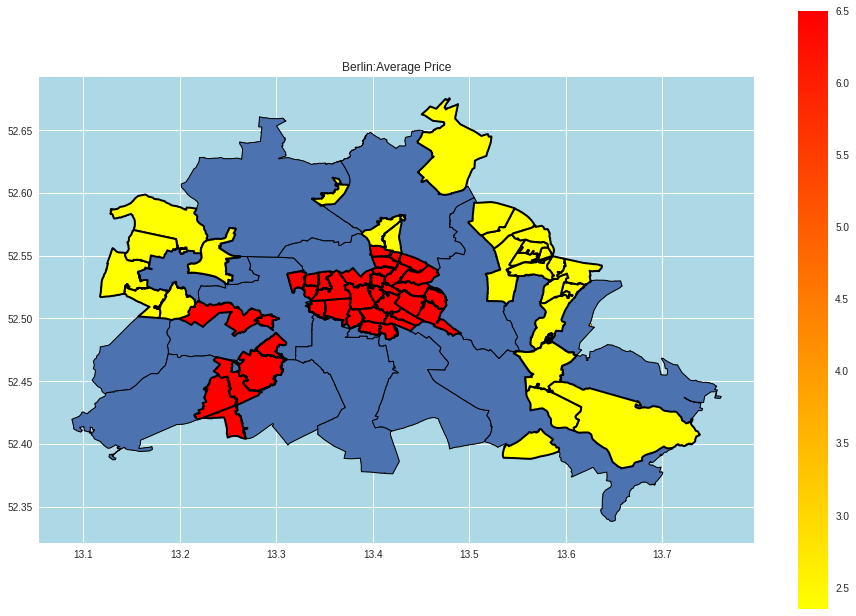

In [20]:
 
show_plot_for('Average Price', show_n_largest=50, show_n_smallest=30, show_bezirke=True)


#Price Trends

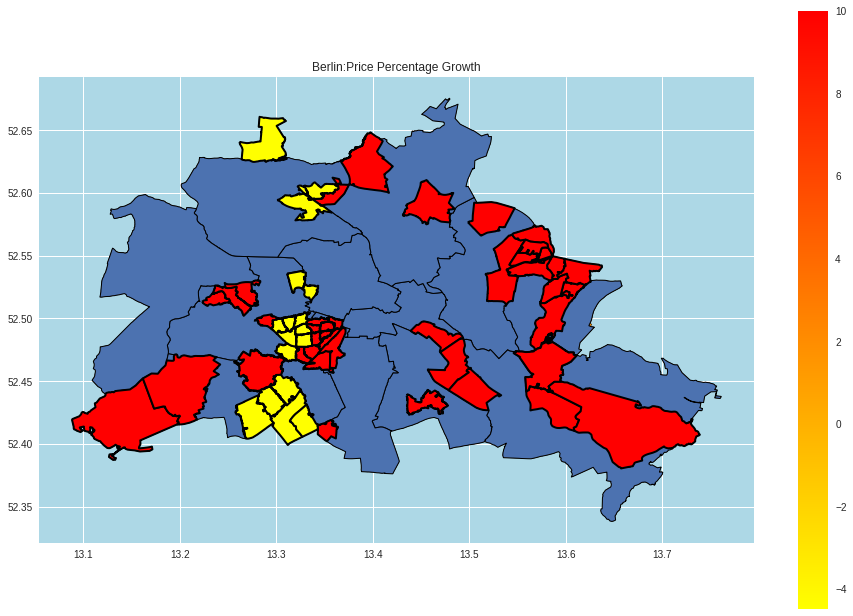

In [36]:
def convert_price_trend_to_array(string):
  string = string.strip('[]').replace('\'', '').split(', ')
  return [int(i) for i in string]

def compute_percentage_growth_rate(trend_array, quarters=4):
  percentages = []
  for i in range(1, len(trend_array)):
    percentages.append(((trend_array[i] - trend_array[i - 1])/trend_array[i - 1])*100)
  return sum(percentages[:quarters])

num_quarters = 1
berlin_df['Price Percentage Growth'] = \
 [compute_percentage_growth_rate(convert_price_trend_to_array(berlin_df['City Price Trend'][i]), quarters=num_quarters) for i in range(len(berlin_df['City Price Trend']))]

show_plot_for('Price Percentage Growth', show_n_largest=50, show_n_smallest=20, print_details=False, show_bezirke=True)                                                                                                                                                              
                                                                                                                                                          


#Finding the Optimum Postcode to Invest In

In [22]:
print_available_categories()


plz
geometry
ort
num_social_proj
total_proj_costs
einwohner
Average Price
Plz Price Trend
City Price Trend
coords
area
Price Percentage Growth


Decide here what you wish to be minimsed and what to optimise

In [139]:
num_quarters = 6 #change this to see percentage increase over desired number of quarters
berlin_df['Price Percentage Growth'] = \
 [compute_percentage_growth_rate(convert_price_trend_to_array(berlin_df['City Price Trend'][i]), quarters=num_quarters) for i in range(len(berlin_df['City Price Trend']))]

dict_max = {'price trend': berlin_df['Price Percentage Growth']}
dict_min = {'average price': berlin_df['Average Price']}

Optimisation Functions

In [137]:
def find_min_and_max(categories_min, categories_max):
  min_opt = []
  max_opt = []

  for key, value in categories_min.items():
    min_opt.append(value.min())
  
  for key, value in categories_max.items():
    max_opt.append(value.max())

  return min_opt, max_opt

def cost_function(min_opt, max_opt, input_min_dict, input_max_dict):
  cost_min_dict = []
  cost_max_dict = []

  for i in range(len(min_opt)):
    cost_min_dict.append((min_opt[i] - input_min_dict[i])**2)
  
  for i in range(len(max_opt)):
    cost_max_dict.append((max_opt[i] - input_max_dict[i])**2)

  return sum(cost_min_dict) + sum(cost_max_dict)


def find_optimal_postcode(dict_min, dict_max):
  values_min = []
  for items in dict_min.values():
    values_min.append(items.tolist())

  values_max = []
  for items in dict_max.values():
    values_max.append(items.tolist())

  min_opt, max_opt = find_min_and_max(dict_min, dict_max)


  cost = []
  
  for i in range(len(values_max[0])):
    input_min_dict = []
    input_max_dict = []
    for j in range(len(values_min)):
      input_min_dict.append(values_min[j][i])

    for j in range(len(values_max)):
      input_max_dict.append(values_max[j][i])

    cost.append(cost_function(min_opt, max_opt, input_min_dict, input_max_dict))

  return cost, np.argmin(np.array(cost)), min(cost)



Finally... Find the best place in Berlin to invest according to your wishes

,plz,geometry,ort,num_social_proj,total_proj_costs,einwohner,Average Price,Plz Price Trend,City Price Trend,coords,area,Price Percentage Growth
238,12555,"POLYGON ((13.54563 52.47263, 13.54641 52.47316...",Berlin,11.0,643.73,26978,3.05,"['3450', '3550', '3550', '3650', '3750', '3750...","['2450', '2550', '2650', '2650', '2800', '3000...","(13.578842047458417, 52.46284906706841)",Treptow-Köpenick,30.806436


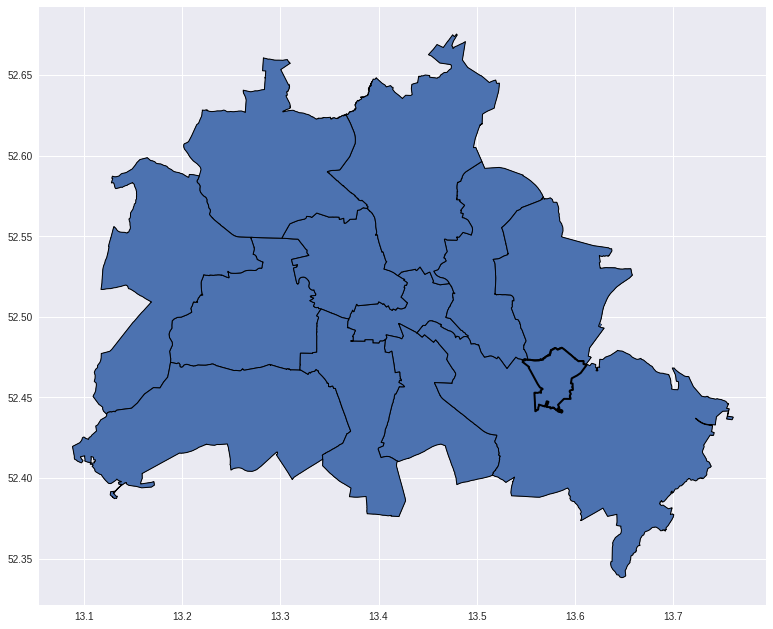

In [140]:
cost, opt_index, min_cost = find_optimal_postcode(dict_min, dict_max)

display(berlin_df.query('index == {}'.format(opt_index)))

fig, ax = plt.subplots()

berlin_df.plot(
    ax=ax, 
    categorical=False, 
    legend=True, 
    edgecolor='black',
    linewidth=0.3
)

districts_df.plot(ax=ax, edgecolor='k',linewidth = 1)

berlin_df.query('index == {}'.format(opt_index)).plot(ax=ax, edgecolor='black',
    linewidth=2)

